In [15]:
from google.colab import files
uploaded = files.upload()

Saving model2.csv to model2.csv


In [16]:
import pandas as pd

df = pd.read_csv("model2.csv")
df.head()

,Company,Model,Test,Release date,Number of Parameters
0,OpenAI,gpt-1,1,06/11/2018,117 million
1,Google,bert-base-uncased,1,10/31/2018,110 million
2,Google,bert-large-uncased,1,10/31/2018,340 million
3,OpenAI,gpt-2,1,2/14/2019,1.5 billion
4,Meta,RoBERTa,1,07/29/2019,355 million


In [17]:
print(df.columns.tolist())
df.columns = ['Company', 'Model', 'Test', 'Release Date', 'Parameters']

['Company', 'Model', 'Test', 'Release date', 'Number of Parameters']


In [18]:
# Convert release dates
df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")

# Convert parameters to numeric (extract numbers from strings like "175 billion")
df["Parameters (B)"] = df["Parameters"].str.extract(r'([\d,.]+)').replace(',', '', regex=True).astype(float)

#Drop rows without valid parameters
df_plot = df.dropna(subset=["Parameters (B)", "Release Date"])

<ipython-input-19-706f12ca743c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["Test"] = pd.to_numeric(df_plot["Test"], errors="coerce")


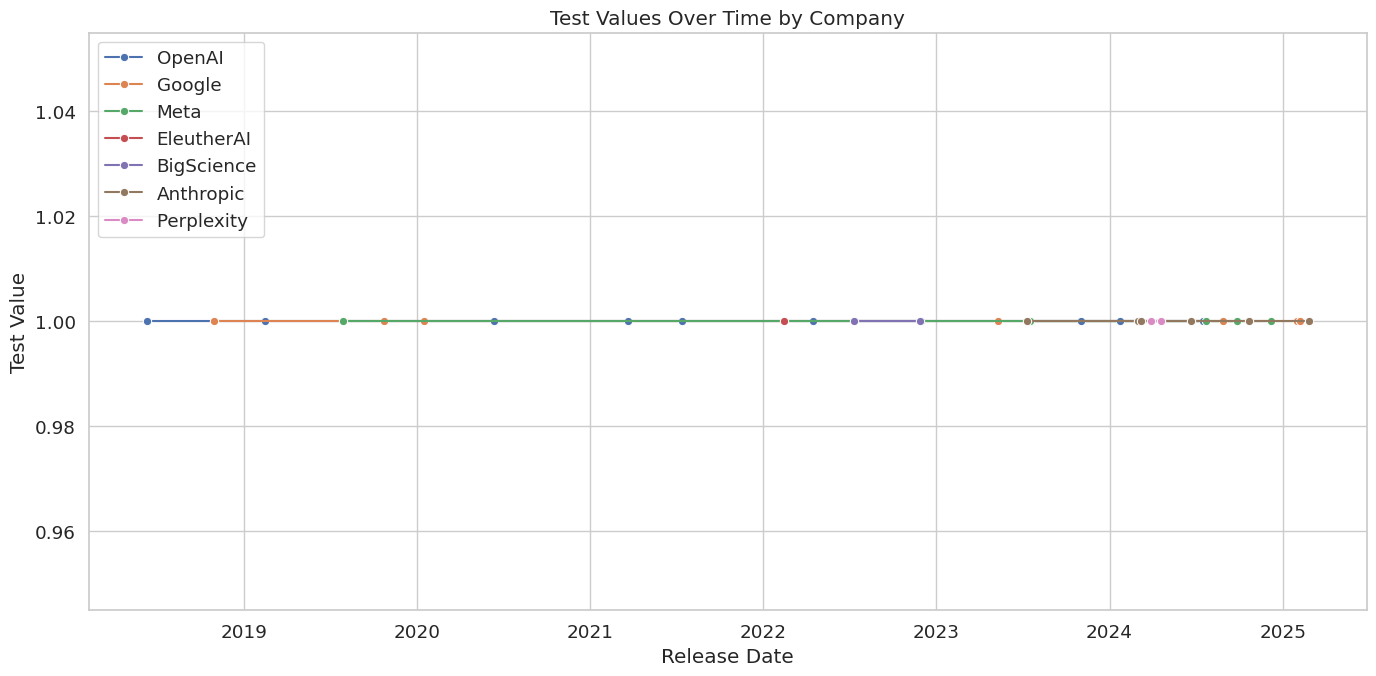

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing Test values
df_plot = df.dropna(subset=["Parameters (B)", "Release Date", "Test"])

# Convert Test values to numeric, if needed
df_plot["Test"] = pd.to_numeric(df_plot["Test"], errors="coerce")

# Sort by Release Date
df_plot = df_plot.sort_values("Release Date")

# Plot
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid", font_scale=1.2)

# Lineplot grouped by Company
sns.lineplot(
    data=df_plot,
    x="Release Date",
    y="Test",
    hue="Company",
    marker="o"
)

plt.title("Test Values Over Time by Company")
plt.xlabel("Release Date")
plt.ylabel("Test Value")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

<ipython-input-21-642d8220075a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-21-642d8220075a>:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


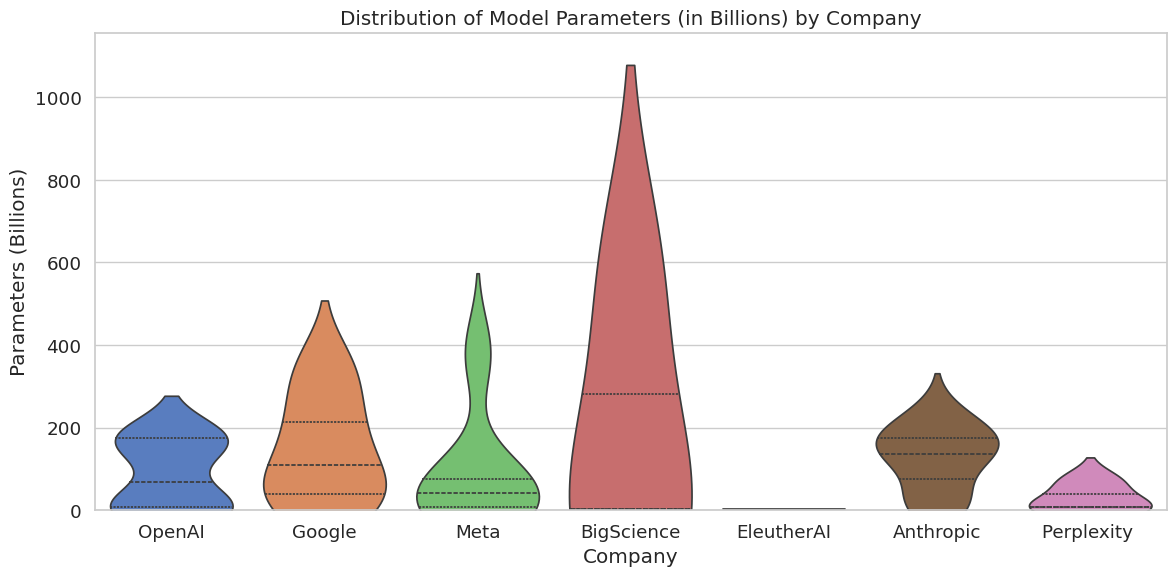

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out non-positive parameter values
df_plot = df[(df["Parameters (B)"] > 0) & df["Company"].notna()]

# Violin plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", font_scale=1.2)

sns.violinplot(
    data=df_plot,
    x="Company",
    y="Parameters (B)",
    inner="quartile",
    scale="width",
    palette="muted"
)

plt.title("Distribution of Model Parameters (in Billions) by Company")
plt.xlabel("Company")
plt.ylabel("Parameters (Billions)")
plt.ylim(bottom=0)  # Ensures y-axis starts at 0
plt.tight_layout()
plt.show()


<ipython-input-22-0e93e1cace89>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


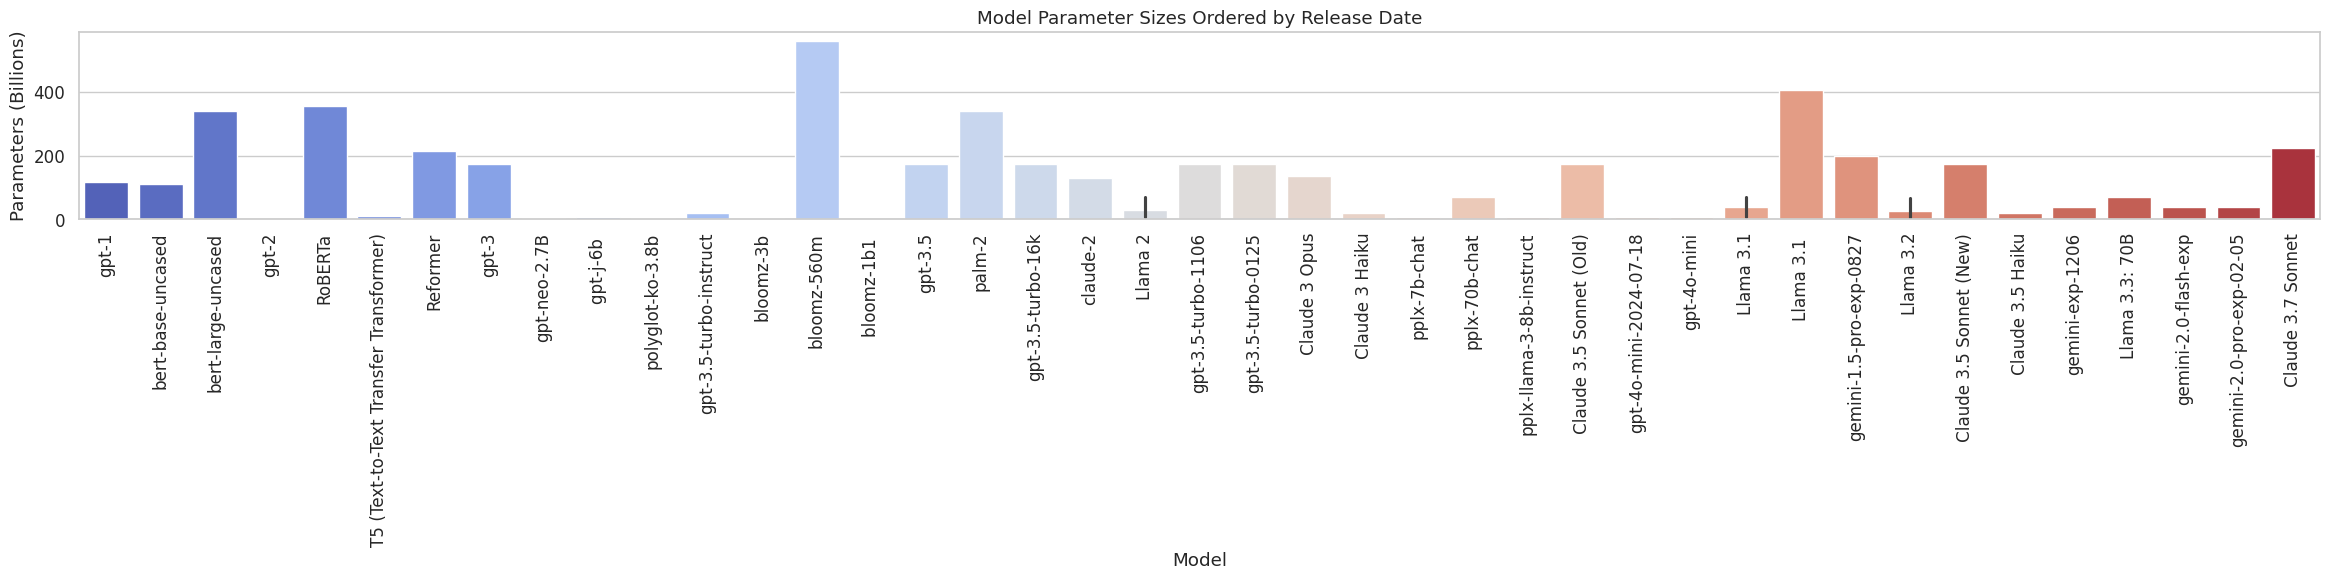

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter and clean data
df_plot = df[["Model", "Parameters (B)", "Release Date"]].dropna()
df_plot = df_plot[df_plot["Parameters (B)"] > 0]

# Sort by release date
df_plot = df_plot.sort_values("Release Date")

# Plot
plt.figure(figsize=(max(12, len(df_plot) * 0.5), 6))
sns.set(style="whitegrid", font_scale=1.1)

sns.barplot(
    data=df_plot,
    x="Model",
    y="Parameters (B)",
    palette="coolwarm"
)

plt.title("Model Parameter Sizes Ordered by Release Date")
plt.xlabel("Model")
plt.ylabel("Parameters (Billions)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


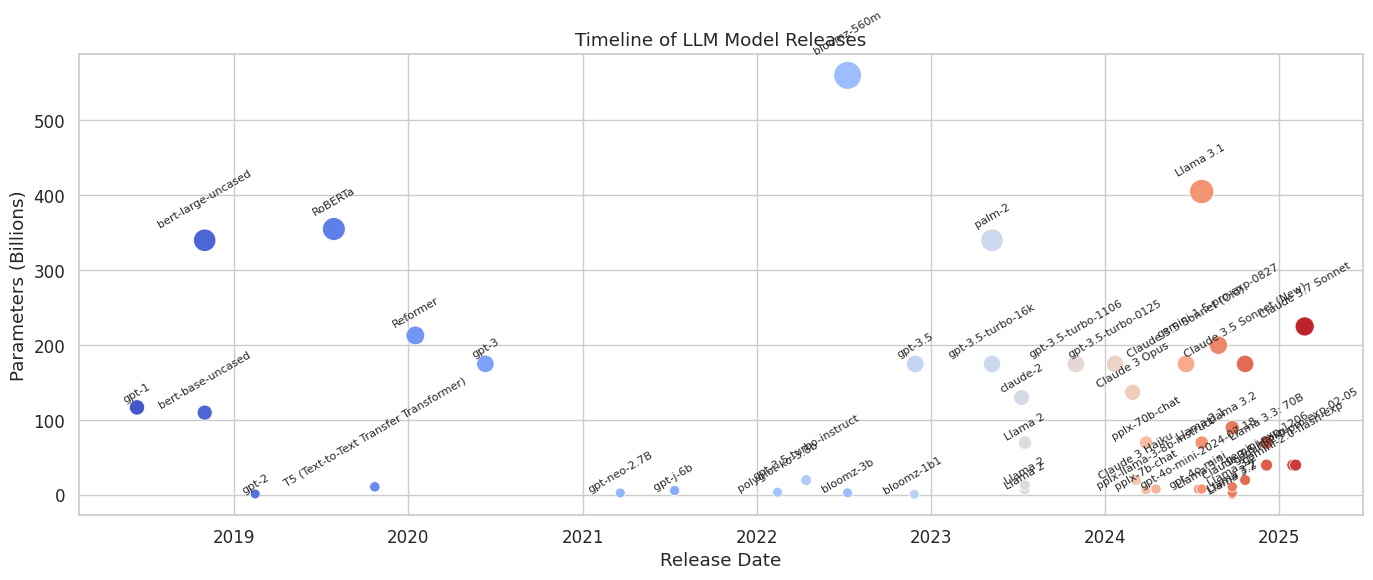

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter and clean data
df_plot = df[["Model", "Release Date", "Parameters (B)"]].dropna()
df_plot = df_plot[df_plot["Parameters (B)"] > 0]

# Plot
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid", font_scale=1.1)

scatter = sns.scatterplot(
    data=df_plot,
    x="Release Date",
    y="Parameters (B)",
    hue="Release Date",
    size="Parameters (B)",
    sizes=(50, 400),
    palette="coolwarm",
    legend=False
)

# Annotate model names
for _, row in df_plot.iterrows():
    scatter.text(
        row["Release Date"],
        row["Parameters (B)"] * 1.05,
        row["Model"],
        fontsize=8,
        ha='center',
        rotation=30
    )

plt.title("Timeline of LLM Model Releases")
plt.xlabel("Release Date")
plt.ylabel("Parameters (Billions)")
plt.tight_layout()
plt.show()
